<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/LSTM_%EC%98%A4%EC%B0%A8%EB%AA%A8%EB%8D%B87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers, Sequential
from keras.layers import RNN
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_7.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,7,0.296,2.25,-20
1,2011.3.7 18:29,7,0.297,2.25,-20
2,2011.3.8 6:29,7,0.298,2.25,-20
3,2011.3.8 18:29,7,0.298,2.25,-20
4,2011.3.9 6:29,7,0.296,2.25,-20
...,...,...,...,...,...
250,2011.8.30 5:28,7,0.619,2.29,-20
251,2011.8.30 17:28,7,0.620,2.30,-20
252,2011.8.31 5:28,7,0.623,2.30,-20
253,2011.8.31 16:09,7,0.639,2.30,-20


In [ ]:
df = df.drop(['CellNo', 'MeasuredDate'], axis=1)
df

,Resistance,Volt,Temp
0,0.296,2.25,-20
1,0.297,2.25,-20
2,0.298,2.25,-20
3,0.298,2.25,-20
4,0.296,2.25,-20
...,...,...,...
250,0.619,2.29,-20
251,0.620,2.30,-20
252,0.623,2.30,-20
253,0.639,2.30,-20


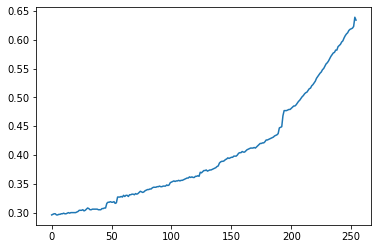

In [ ]:
df['Resistance'].plot()
train = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

     Volt  Temp  Resistance
0     0.0   0.0    0.000000
1     0.0   0.0    0.002915
2     0.0   0.0    0.005831
3     0.0   0.0    0.005831
4     0.0   0.0    0.000000
..    ...   ...         ...
250   0.8   0.0    0.941691
251   1.0   0.0    0.944606
252   1.0   0.0    0.953353
253   1.0   0.0    1.000000
254   1.0   0.0    0.985423

[255 rows x 3 columns]


In [ ]:
train = df_scaled

In [ ]:
train

,Volt,Temp,Resistance
0,0.0,0.0,0.000000
1,0.0,0.0,0.002915
2,0.0,0.0,0.005831
3,0.0,0.0,0.005831
4,0.0,0.0,0.000000
...,...,...,...
250,0.8,0.0,0.941691
251,1.0,0.0,0.944606
252,1.0,0.0,0.953353
253,1.0,0.0,1.000000


train 끝



In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
train_feature

# test_feature, test_label = make_dataset(test_feature, test_label, 20)
# test_feature.shape, test_label.shape

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00291545],
        [0.        , 0.        , 0.0058309 ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181]],

       [[0.        , 0.        , 0.00291545],
        [0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.0058309 ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181]],

       [[0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.0058309 ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01166181],
        [0.        , 0.        , 0.01457726]],

       ...,

       [[0.6       , 0.        , 0.79008746],
        [0.6       , 0.        , 0.80174927],
        [0.6       , 0

LSTM 모델


In [ ]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/Users/wlsrm/data', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

h = model.fit(x_train, y_train, 
                    epochs=1000, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid))

Epoch 1/1000
12/12 [==============================] - 2s 32ms/step - loss: 0.1340 - mse: 0.1340 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 2/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 3/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 4/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 5/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 7/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/1000
12/12 [==============================] - 0s 10ms/step - 

In [ ]:
print(h.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


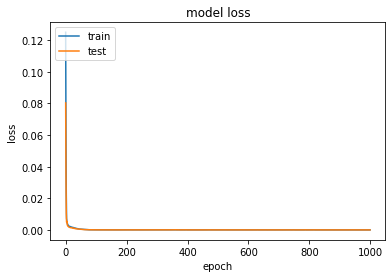

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

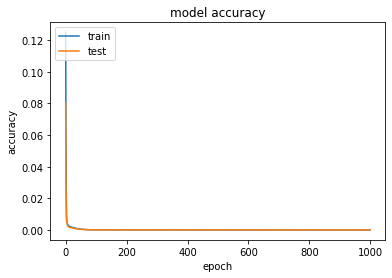

In [ ]:
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')
test_df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,3,0.298,2.23,-20
1,2011.3.7 18:29,3,0.298,2.23,-20
2,2011.3.8 6:29,3,0.297,2.24,-20
3,2011.3.8 18:29,3,0.299,2.23,-20
4,2011.3.9 6:29,3,0.298,2.24,-20
...,...,...,...,...,...
253,2011.8.30 5:28,3,0.316,2.25,-20
254,2011.8.30 17:28,3,0.316,2.25,-20
255,2011.8.31 5:28,3,0.315,2.25,-20
256,2011.8.31 16:09,3,0.318,2.25,-20


In [ ]:
test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)
test_df

,Resistance,Volt,Temp
0,0.298,2.23,-20
1,0.298,2.23,-20
2,0.297,2.24,-20
3,0.299,2.23,-20
4,0.298,2.24,-20
...,...,...,...
253,0.316,2.25,-20
254,0.316,2.25,-20
255,0.315,2.25,-20
256,0.318,2.25,-20


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

print(test_df_scaled)

         Volt  Temp  Resistance
0    0.333333   0.0    0.047619
1    0.333333   0.0    0.047619
2    0.666667   0.0    0.000000
3    0.333333   0.0    0.095238
4    0.666667   0.0    0.047619
..        ...   ...         ...
253  1.000000   0.0    0.904762
254  1.000000   0.0    0.904762
255  1.000000   0.0    0.857143
256  1.000000   0.0    1.000000
257  1.000000   0.0    0.904762

[258 rows x 3 columns]


In [ ]:
test = test_df_scaled

In [ ]:
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

# train_feature = train[feature_cols]
# train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - mse: 0.0017
Loss: [0.0017371157882735133, 0.0017371157882735133]


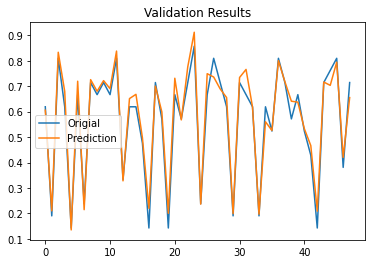

In [ ]:
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [ ]:
yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - mse: 0.0017
Loss: [0.0017371157882735133, 0.0017371157882735133]
(48,) (48, 1)


In [ ]:
mse = mean_squared_error(y_test, yp)
mse

0.001737117225221889

2/2 [==============================] - 0s 5ms/step - loss: 6.2572e-04 - mse: 6.2572e-04
Loss: [0.0006257158238440752, 0.0006257158238440752]


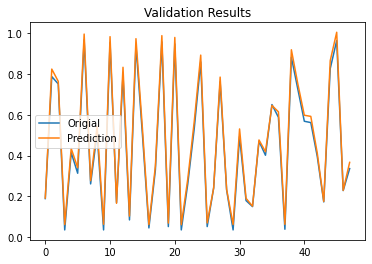

2/2 [==============================] - 0s 5ms/step - loss: 6.2572e-04 - mse: 6.2572e-04
Loss: [0.0006257158238440752, 0.0006257158238440752]
(48,) (48, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 5ms/step - loss: 8.7935e-04 - mse: 8.7935e-04
Loss: [0.0008793523302301764, 0.0008793523302301764]


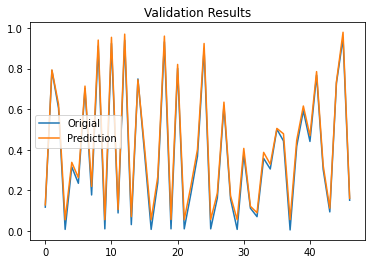

2/2 [==============================] - 0s 8ms/step - loss: 8.7935e-04 - mse: 8.7935e-04
Loss: [0.0008793523302301764, 0.0008793523302301764]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - mse: 0.0073
Loss: [0.007295907009392977, 0.007295907009392977]


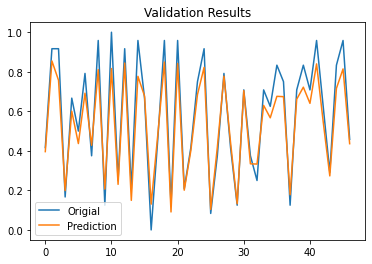

2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073
Loss: [0.007295907009392977, 0.007295907009392977]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010    
Loss: [0.001012976630590856, 0.001012976630590856]


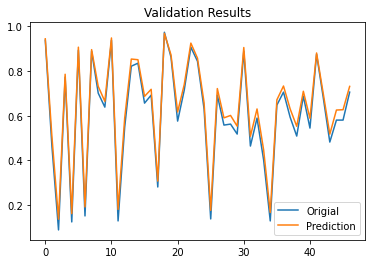

2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - mse: 0.0010    
Loss: [0.001012976630590856, 0.001012976630590856]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043
Loss: [0.004291872028261423, 0.004291872028261423]


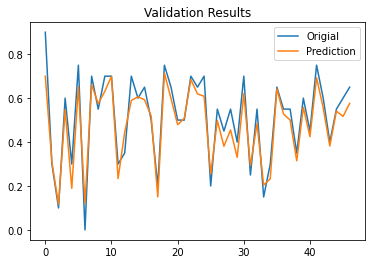

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043
Loss: [0.004291872028261423, 0.004291872028261423]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 9.7332e-04 - mse: 9.7332e-04
Loss: [0.0009733210317790508, 0.0009733210317790508]


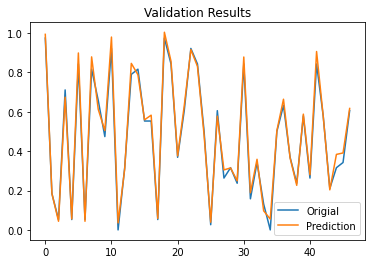

2/2 [==============================] - 0s 7ms/step - loss: 9.7332e-04 - mse: 9.7332e-04
Loss: [0.0009733210317790508, 0.0009733210317790508]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - mse: 0.0057
Loss: [0.005689496640115976, 0.005689496640115976]


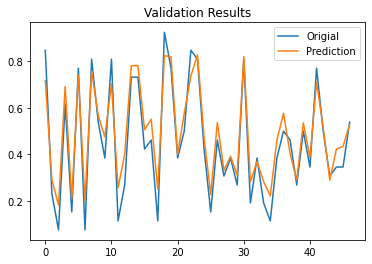

2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - mse: 0.0057
Loss: [0.005689496640115976, 0.005689496640115976]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)